<a href="https://colab.research.google.com/github/jsebastianquiroga/CLUSTERING_MODELS_CARS_JAV/blob/main/Notebook/TALLER_3_CLUSTERING_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">

TALLER NUMERO CINCO.

APRENDIZAJE DE MAQUINA.
UNIVERSIDAD JAVERIANA

PROFESOR:CESAR ORLANDO DIAZ BENITO.

***INTEGRANTES*** :</P>
**LEONARDO GARCÍA**</P>
**JUAN SEBASTÍAN QUIROGA**</P>
**ROBINSSON SÁNCHEZ**</P>



En el presente taller se busca generar varios modelos con la base de https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial cuyo dataset cuenta con 7 variables distintas, las cuales son numericas y categoricas.

Este taller esta dividio en 7 etapas:
<ol>
<li> Cargar Data Set y exploración inicial de los datos. </li>
<li> Preparación de los datos.</li>
<li> Modelo: Decision Tree.</li>
<li> Modelo: Decision Tree Sklearn.</li>
<li> Modelo: Random Forest. </li>
<li> Modelo: K-means. </li>
<li> Modelo: DBSCAN. </li>
</ol>

In [ ]:
!pip install --upgrade category_encoders
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import category_encoders as ce
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# <h2> 1.Cargar Data Set y exploración inicial de los datos.</h2>

Se importan todoas las funciones a ser utilizadas

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
df_car_complete = '1uIKgryJdsJcnxWYnKjT4M6dP92MWKHzm'
download = drive.CreateFile({'id': df_car_complete}) 
# Download the file to a local disc
download.GetContentFile('car_evaluation.csv')
dtype_dict = {"buying": object ,
              "maint" :object, #will be read with "parse_dates" parameter
              "doors" : np.int8, 
              "persons" : object,
              "lug_boot" : object,  
              "safety" : object,
              "class" : object
             }
df_car = pd.read_csv('car_evaluation.csv', header=None,dtype=dtype_dict)
df_car.columns= dtype_dict.keys()
df_car

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df_car.shape

(1728, 7)

In [ ]:
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# <h2>2. Preparación de los datos.</h2>

In [ ]:
# declare feature vector and target variable 
X = df_car.drop(['class'], axis=1)
y = df_car['class']

In [ ]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [ ]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [ ]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


# <h2> 3.Modelo: Decision Tree.</h2>

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
# predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8021


In [ ]:
# compare the train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7865


In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


[Text(0.4, 0.875, 'X[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.6, 0.625, 'X[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.4, 0.375, 'X[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.2, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

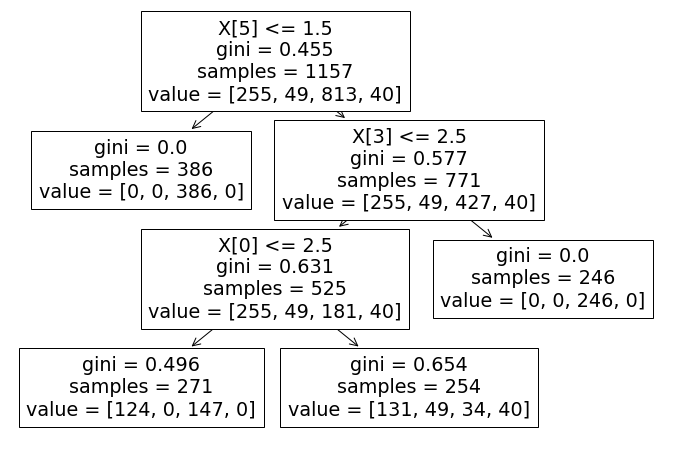

In [ ]:
# visualize decision-trees
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# <h2> 4.Modelo: Decision Tree Sklearn:</h2>

In [ ]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

[Text(0.3626543209876543, 0.9615384615384616, 'X[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.35030864197530864, 0.8846153846153846, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.375, 0.8846153846153846, 'X[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.3626543209876543, 0.8076923076923077, 'X[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.10493827160493827, 0.7307692307692307, 'X[1] <= 2.5\ngini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.037037037037037035, 0.6538461538461539, 'X[0] <= 1.5\ngini = 0.259\nsamples = 131\nvalue = [20, 0, 111, 0]'),
 Text(0.024691358024691357, 0.5769230769230769, 'gini = 0.0\nsamples = 70\nvalue = [0, 0, 70, 0]'),
 Text(0.04938271604938271, 0.5769230769230769, 'X[1] <= 1.5\ngini = 0.441\nsamples = 61\nvalue = [20, 0, 41, 0]'),
 Text(0.037037037037037035, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32, 0]'),
 Text(0.0617283950

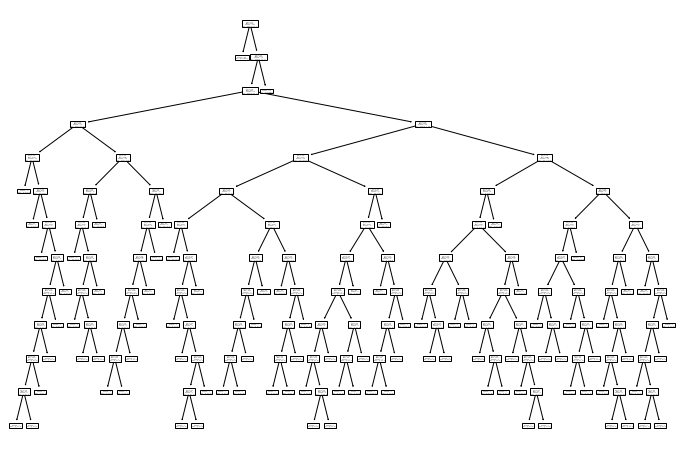

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(clf)

In [ ]:
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


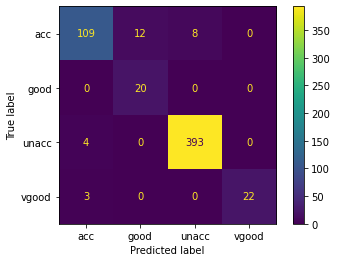

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [ ]:
clf.score(X_test, y_test)

0.9527145359019265

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.94      0.84      0.89       129
        good       0.62      1.00      0.77        20
       unacc       0.98      0.99      0.98       397
       vgood       1.00      0.88      0.94        25

    accuracy                           0.95       571
   macro avg       0.89      0.93      0.90       571
weighted avg       0.96      0.95      0.95       571



# <h2> 5.Modelo: Random Forest.</h2>

In [ ]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=3)
scores.mean()

0.9204651997398111

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test)

0.9334500875656743

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


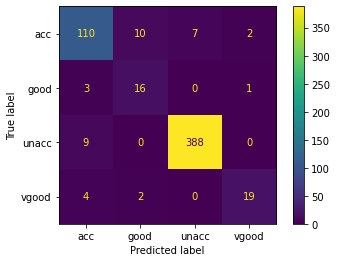

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.87      0.85      0.86       129
        good       0.57      0.80      0.67        20
       unacc       0.98      0.98      0.98       397
       vgood       0.86      0.76      0.81        25

    accuracy                           0.93       571
   macro avg       0.82      0.85      0.83       571
weighted avg       0.94      0.93      0.93       571



# <h2> 6.Modelo: K-means.</h2>

In [ ]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

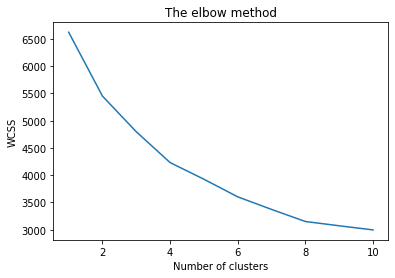

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train)

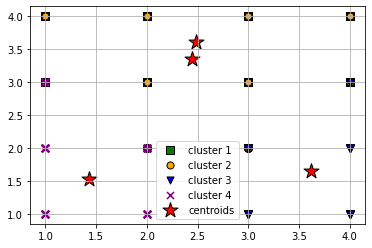

In [ ]:
X = np.array(X_train)
# plot the 3 clusters
plt.scatter(
    X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
    s=50, c='green',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
    s=50, c='blue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[y_kmeans == 3, 0], X[y_kmeans == 3, 1],
    s=50, c='purple',
    marker='x', edgecolor='black',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# <h2> 7.Modelo: DBSCAN</h2>


In [ ]:
labels_true = y_train
labels_true

48      unacc
468     unacc
155     unacc
1721     good
1208    unacc
        ...  
1130    vgood
1294     good
860       acc
1459    unacc
1126      acc
Name: class, Length: 1157, dtype: object

In [ ]:
len(labels_true)

1157

In [ ]:
#X_train = StandardScaler().fit_transform(X_train)

db = DBSCAN(eps=1.3, min_samples=11).fit(X_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train, labels))

Estimated number of clusters: 6
Estimated number of noise points: 1044
Homogeneity: 0.035
Completeness: 0.067
V-measure: 0.046
Adjusted Rand Index: 0.111
Adjusted Mutual Information: 0.034
Silhouette Coefficient: -0.275


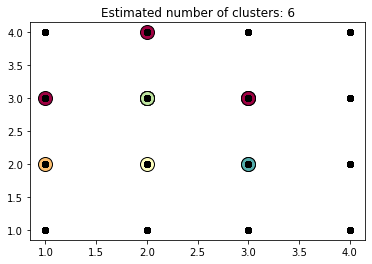

In [ ]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_train[class_member_mask & core_samples_mask].values
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_train[class_member_mask & ~core_samples_mask].values
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X_train.iloc[:, 1:3].values)
X_train.iloc[:, 1:3] = imputer.transform(X_train.iloc[:, 1:3].values)